In [2]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Reshape
from keras.optimizers import Adam, SGD
from keras.callbacks import Callback
from Kfocusing import FocusedLayer1D
from keras_utils import SGDwithLR, RMSpropwithClip
from keras.optimizers import RMSprop
from keras import backend as K

ModuleNotFoundError: No module named 'gym'

In [2]:
lr_dict = {'all':0.01,
           'focus-1/Sigma:0': 0.01,'focus-1/Mu:0': 0.01,'focus-1/Weights:0': 0.01,
           'dense-1/Weights:0':0.01}
        
#lr_dict = {'all':0.0001}

mom_dict = {'all':0.9}
#decay_dict = {'all':0.9}
#mom_dict = {'all':0.9,'focus-1/Sigma:0': 0.25,'focus-1/Mu:0': 0.25,
#           'focus-2/Sigma:0': 0.25,'focus-2/Mu:0': 0.25}
    
decay_dict = {'all':0.9, 'focus-1/Sigma:0': 0.1,'focus-1/Mu:0':0.1}

clip_dict = {'focus-1/Sigma:0':(0.05,1.0),'focus-1/Mu:0':(0.0,1.0)}

In [3]:
def build_model(input_size
                ,output_size
                ,N=32
                ,mode='adam'
                ,optimizer_s='SGDwithLR'):
    
    model = Sequential()
    model.add(Dense(32, input_dim=input_size, activation='elu',name='dense-1'))
    if mode=='dense':
        model.add(Dense(32, activation='elu'))
    elif mode=='focused':
        model.add(FocusedLayer1D(units=N
                                 ,name='focus-1'
                                 ,activation='elu'
                                 ,init_sigma=0.25
                                 ,init_mu='spread'
                                 ,init_w= None
                                 ,train_sigma=True
                                 ,train_weights=True
                                 ,train_mu = True
                                 ,normed=2))
        
    model.add(Dense(output_size, activation='linear'))
    
    if optimizer_s == 'SGDwithLR':
        opt = SGDwithLR(lr_dict, mom_dict,decay_dict,clip_dict)#, decay=None)
    elif optimizer_s=='RMSpropwithClip':
        opt = RMSpropwithClip(lr=0.001, rho=0.9, epsilon=None, decay=0.0,clips=clip_dict)
    elif optimizer_s=='adam':
        ##adam with clip
        opt = Adam()
    else:
        opt = SGD(lr=0.01, momentum=0.9)#, decay=None)


    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

    print(model.summary())

    return model

In [4]:
def train_model(training_data,mode,epochs,optimizer_s):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0])
                        ,output_size=len(y[0])
                        ,mode=mode
                        ,optimizer_s=optimizer_s)

    history = model.fit(X, y, epochs=epochs)
    
    return model, history

In [5]:
def plotTheValues(scores):
    x = []
    y = []
    for i in range(0, len(scores)):
        x.append(int(i))
        y.append(int(scores[i]))

    plt.figure(figsize=(20, 15))

    plt.plot(x, y, label="score per run")

    plt.plot(x[-100:], [np.mean(y[-100:])] * len(y[-100:]), linestyle="--", label="last 100 runs average")

    trend_x = x[1:]
    z = np.polyfit(np.array(trend_x), np.array(y[1:]), 1)
    p = np.poly1d(z)
    plt.plot(trend_x, p(trend_x), linestyle="-.",  label="trend")


    plt.xlabel("episodes")
    plt.ylabel("scores")
    plt.legend(loc="upper left")

In [6]:
mean = lambda lst, key: lst.count(key)/len(lst)

In [7]:
import gym
env = gym.make('NChain-v0')
env.reset()
print(env.action_space.sample())
#> Discrete(2)
print(env.observation_space)
for _ in range(1000):
    #env.render()
    #env.print()
    action = env.action_space.sample()
    observation, reward, done, _=env.step(action) # take a random action
    print(observation, reward, done, action)
env.close()

1
Discrete(5)
1 0 False 0
0 2 False 1
1 0 False 0
2 0 False 0
0 2 False 1
0 2 False 1
0 2 False 1
0 2 False 0
1 0 False 0
2 0 False 0
3 0 False 1
4 0 False 0
4 10 False 0
0 2 False 1
1 0 False 1
0 2 False 1
0 2 False 1
0 2 False 1
0 2 False 1
1 0 False 0
2 0 False 0
0 2 False 0
1 0 False 0
0 2 False 1
0 2 False 1
1 0 False 0
0 2 False 1
0 2 False 1
1 0 False 0
0 2 False 0
0 2 False 1
0 2 False 1
0 2 False 0
0 2 False 1
0 2 False 1
1 0 False 1
0 2 False 1
1 0 False 0
0 2 False 1
1 0 False 0
0 2 False 1
1 0 False 0
2 0 False 0
3 0 False 0
0 2 False 0
0 2 False 1
0 2 False 1
0 2 False 1
1 0 False 1
2 0 False 0
3 0 False 1
0 2 False 1
1 0 False 0
0 2 False 1
0 2 False 1
1 0 False 0
2 0 False 0
0 2 False 1
1 0 False 0
2 0 False 0
3 0 False 1
4 0 False 0
4 10 False 0
0 2 False 1
0 2 False 1
0 2 False 1
0 2 False 1
1 0 False 0
0 2 False 1
1 0 False 1
2 0 False 0
3 0 False 0
4 0 False 0
0 2 False 1
1 0 False 1
2 0 False 0
3 0 False 0
4 0 False 0
0 2 False 1
1 0 False 0
0 2 False 1
0 2 False 1


0 2 False 1
0 2 False 1
0 2 False 1
1 0 False 0
2 0 False 1
0 2 False 1
0 2 False 1
1 0 False 0
0 2 False 0
0 2 False 1
1 0 False 0
0 2 False 0
0 2 False 0
0 2 False 1
1 0 False 0
2 0 False 0
3 0 False 1
0 2 False 0
0 2 False 1
0 2 False 0
1 0 False 0
0 2 False 1
1 0 False 0
2 0 False 0
3 0 True 0


In [8]:
[observation, action]

[3, 0]

# NChain section

In [9]:
def NChain_Training(env,episodes,score_requirement):
    env.reset()
    training_data = []
    accepted_scores = []
    for _ in range(episodes):
        done = False # represents goal_steps
        score = 0
        game_memory = []
        previous_observation = []
        record = False
        while not done:
            action = np.random.randint(0, 2)
            observation, reward, done, _ = env.step(action)

            if record:
                game_memory.append([previous_observation, action])

            record = True

            previous_observation = observation

            score += reward

        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                
                mem1 = np.zeros([5])
                mem2 = np.zeros([2])
                mem1[data[0]] = data[0]
                mem2[data[1]] = data[1]
                training_data.append([mem1, mem2])

        env.reset()
    
    
    return training_data

In [10]:
def NChain_Run(env,iterations,trained_model):
    env.reset()
    scores = []
    choices = []
    for each_game in range(iterations):
        score = 0
        prev_obs = []
        random = True
        done = False
        while not done:
            if random:
                action = np.random.randint(0, 2)
                random = False
            else:
                action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])


            choices.append(action)
            new_observation, reward, done, _ = env.step(action)

            obs = np.zeros([5])
            obs[new_observation] = new_observation
            prev_obs = obs

            score += reward

        env.reset()
        scores.append(score)
        
    return scores, choices

In [19]:
K.clear_session()

env = gym.make('NChain-v0')
score_requirement = 1500
episodes = 600
iterations = 250
mode = 'dense'
optimizer_s='adam'
epochs = 5

In [20]:
NChain_Training_Data = NChain_Training(env=env
                                       ,episodes=episodes
                                       ,score_requirement=score_requirement)
print(len(NChain_Training_Data))

10989


In [21]:
NChain_trained_model_dense, NChain_model_history_dense = train_model(training_data=NChain_Training_Data
                                                                     ,mode=mode
                                                                     ,epochs=epochs
                                                                     ,optimizer_s='SGDwithLR')




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 1,314
Trainable params: 1,314
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


2020-04-19 21:36:22.764733: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-04-19 21:36:22.954150: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999965000 Hz
2020-04-19 21:36:22.959044: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563ad17b8650 executing computations on platform Host. Devices:
2020-04-19 21:36:22.963051: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2020-04-19 21:36:23.101498: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-04-19 21:36:23.158393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-19 21:36:23.158805: I tensorflow/cor

10989/10989 [==============================] - 30s 3ms/step - loss: 0.1916 - acc: 0.4892
Epoch 2/5
10989/10989 [==============================] - 1s 60us/step - loss: 0.1862 - acc: 0.4892
Epoch 3/5
10989/10989 [==============================] - 1s 60us/step - loss: 0.1863 - acc: 0.4892
Epoch 4/5
10989/10989 [==============================] - 1s 58us/step - loss: 0.1864 - acc: 0.4892
Epoch 5/5
10989/10989 [==============================] - 1s 58us/step - loss: 0.1860 - acc: 0.4892


In [19]:
NChain_trained_model_focused, NChain_model_history_focused = train_model(training_data=NChain_Training_Data
                                                                         ,mode='focused'
                                                                         ,epochs=epochs
                                                                         ,optimizer_s='SGDwithLR')

{'name': 'focus-1'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 128)               768       
_________________________________________________________________
focus-1 (FocusedLayer1D)     (None, 64)                8384      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
focus-1/Mu:0 dict_keys(['all', 'focus-1/Sigma:0', 'focus-1/Mu:0', 'focus-1/Weights:0', 'dense-1/Weights:0'])
focus-1/Mu:0 dict_keys(['all', 'focus-1/Sigma:0', 'focus-1/Mu:0'])
focus-1/Mu:0 dict_keys(['focus-1/Sigma:0', 'focus-1/Mu:0'])
focus-1/Sigma:0 dict_keys(['all', 'focus-1/Sigma:

In [21]:
NChain_scores, NChain_choices = NChain_Run(env=env
                                           ,iterations=iterations
                                           ,trained_model=NChain_trained_model_focused)

Average Score:  1007.208
choice 1:0.499996 choice 0:0.500004


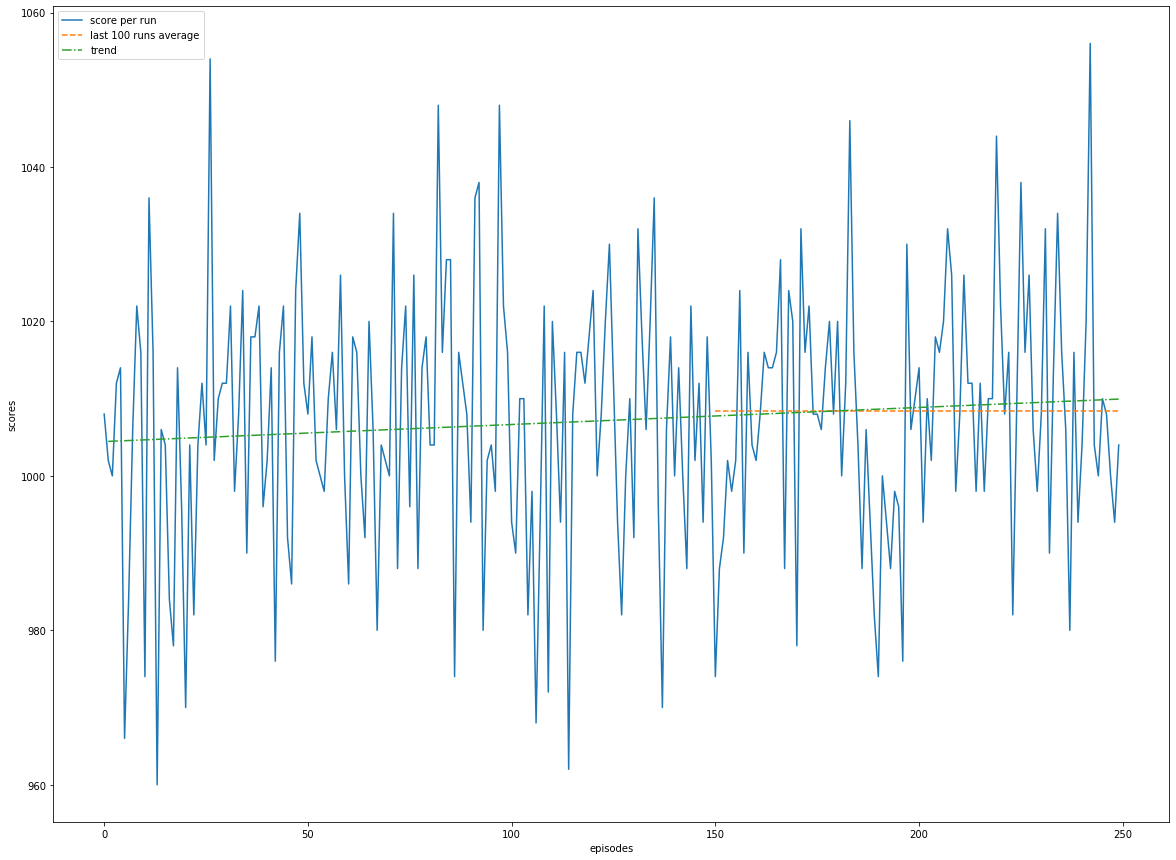

In [22]:
print('Average Score: ',sum(NChain_scores)/len(NChain_scores))
print(f"choice 1:{mean(NChain_choices,1)} choice 0:{mean(NChain_choices,0)}")

plotTheValues(NChain_scores)

# FocusedNN Graphs

Average Score:  1602.736
choice 1:0.9995 choice 0:0.0005


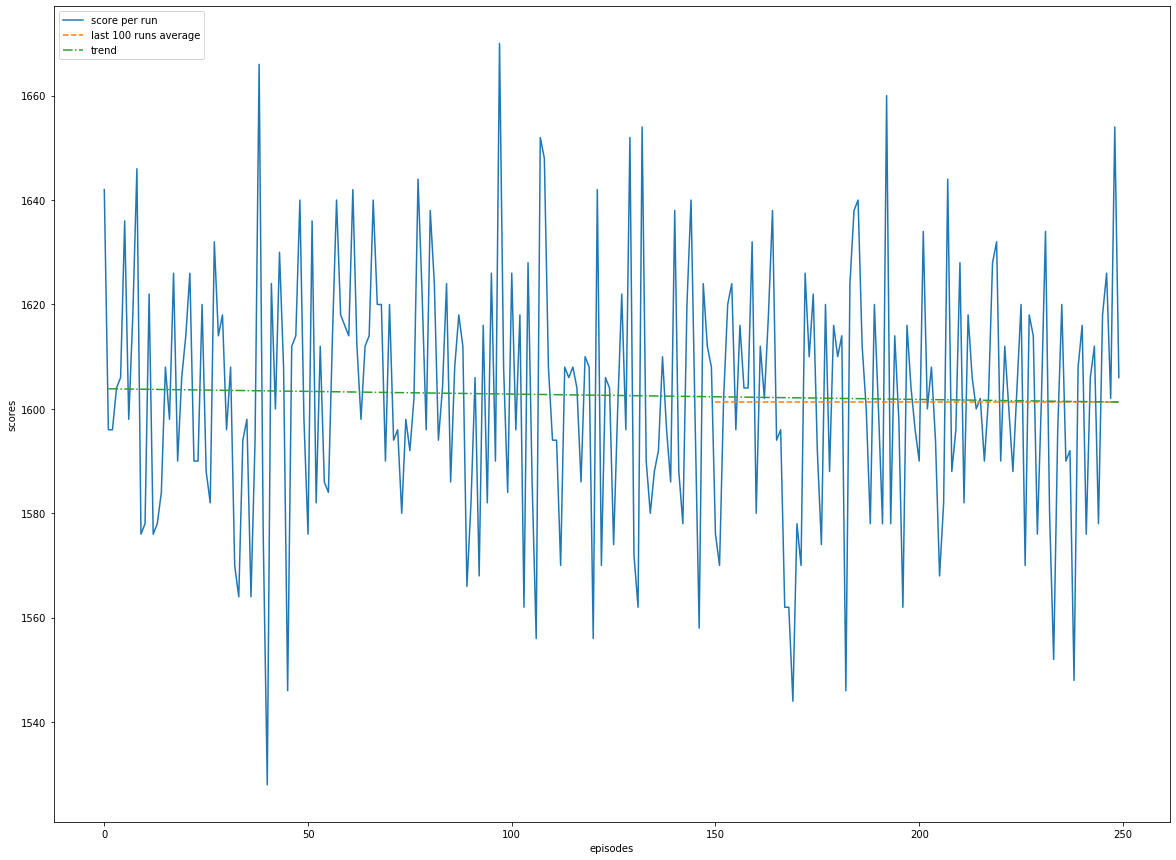

In [0]:
print('Average Score: ',sum(NChain_scores)/len(NChain_scores))
print(f"choice 1:{mean(NChain_choices,1)} choice 0:{mean(NChain_choices,0)}")

plotTheValues(NChain_scores)

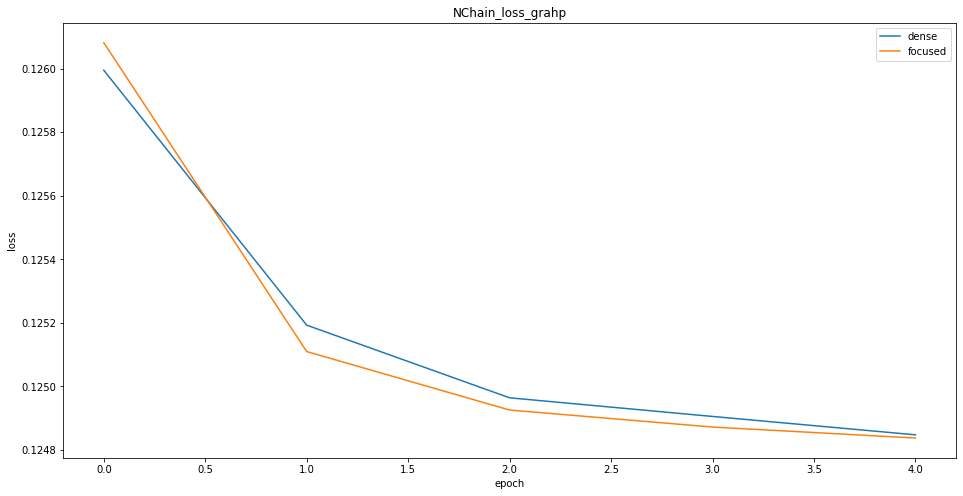

In [0]:
plt.figure(figsize=(16,8))
plt.title('NChain_loss_grahp')
plt.plot(NChain_model_history_dense.history['loss'])
plt.plot(NChain_model_history_focused.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['dense','focused'])
plt.savefig('./graphs/NChain_loss_grahp.png', bbox_inches="tight")

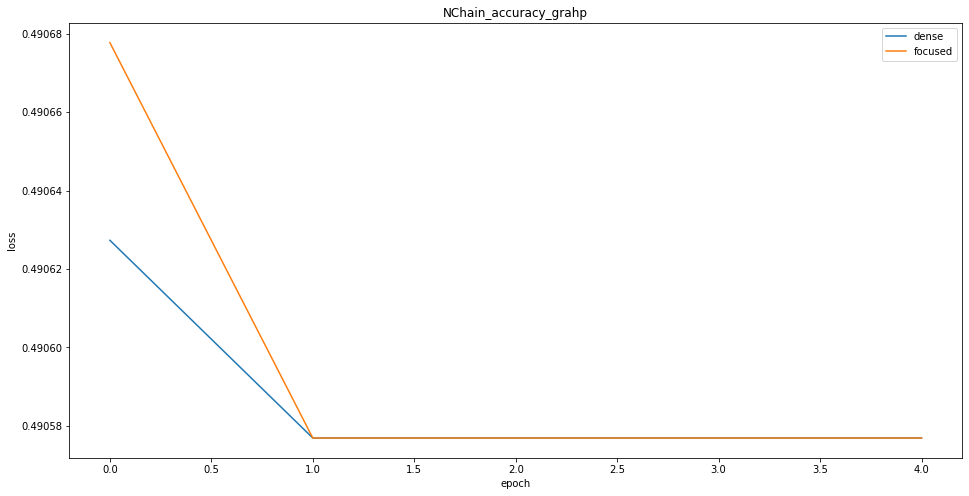

In [0]:
plt.figure(figsize=(16,8))
plt.title('NChain_accuracy_grahp')
plt.plot(NChain_model_history_dense.history['accuracy'])
plt.plot(NChain_model_history_focused.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense','focused'])
plt.savefig('./graphs/NChain_accuracy_grahp.png', bbox_inches="tight")

# MountainCar section

In [23]:
def MountainCar_Training(env,episodes,score_requirement,goal_steps):
    env.reset()
    training_data = []
    accepted_scores = []
    for game_index in range(episodes):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)

            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])

            previous_observation = observation
            if observation[0] > -0.2:
                reward = 1

            score += reward
            if done:
                break

        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])

        env.reset()
        
    return training_data

In [24]:
def MountainCar_Run(env,iterations,trained_model,goal_steps):
    env.reset()
    scores = []
    choices = []
    for each_game in range(iterations):
        score = 0
        prev_obs = []
        for step_index in range(goal_steps):
            env.render()
            if len(prev_obs)==0:
                action = random.randrange(0,2)
            else:
                action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])

            choices.append(action)
            new_observation, reward, done, info = env.step(action)
            prev_obs = new_observation

            score += reward
            if done:
                break

        env.reset()
        scores.append(score)
        
    return scores, choices

In [1]:
K.clear_session()

env = gym.make('MountainCar-v0')
goal_steps = 200
score_requirement = -198
episodes = 10000
iterations = 250
mode = 'dense'
optimizer_s='adam'
epochs = 5

NameError: name 'K' is not defined

In [26]:
MountainCar_Training_Data = MountainCar_Training(env=env
                                                 ,episodes=episodes
                                                 ,score_requirement=score_requirement
                                                 ,goal_steps=goal_steps)

In [27]:
MountainCar_trained_model_dense, MountainCar_model_history_dense = train_model(training_data=MountainCar_Training_Data
                                                                               ,mode=mode
                                                                               ,epochs=epochs
                                                                               ,optimizer_s=optimizer_s)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 52)                6708      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 159       
Total params: 7,251
Trainable params: 7,251
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
8557/8557 [==============================] - 1s 89us/step - loss: 0.2270 - acc: 0.3404
Epoch 2/5
8557/8557 [==============================] - 1s 71us/step - loss: 0.2219 - acc: 0.3567
Epoch 3/5
8557/8557 [==============================] - 1s 65us/step - loss: 0.2218 - acc: 0.3616
Epoch 4/5
8557/8557 [==============================] - 1s 66us/step - loss: 0.2210 - acc: 0.3764
Epoch 5/5
8

In [0]:
MountainCar_trained_model_focused, MountainCar_model_history_focused = train_model(training_data=MountainCar_Training_Data
                                                                                   ,mode='focused'
                                                                                   ,epochs=epochs
                                                                                   ,optimizer_s=optimizer_s)

{'name': 'focus-1'}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 128)               384       
_________________________________________________________________
focus-1 (FocusedLayer1D)     (None, 64)                8384      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 8,963
Trainable params: 8,963
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
11144/11144 [==============================] - 1s 90us/step - loss: 0.2259 - accuracy: 0.3510
Epoch 2/5
11144/11144 [==============================] - 1s 74us/step - loss: 0.2221 - accuracy: 0.3576
Epoch 3/5
11144/11144 [==============================]

In [0]:
MountainCar_scores, MountainCar_choices = MountainCar_Run(env=env
                                                          ,iterations=iterations
                                                          ,trained_model=MountainCar_trained_model_focused
                                                          ,goal_steps=goal_steps)

Average Score:  -163.468
choice 1:0.20720875033645728 choice 0:0.10649179044216606 choice 2:0.6862994592213767


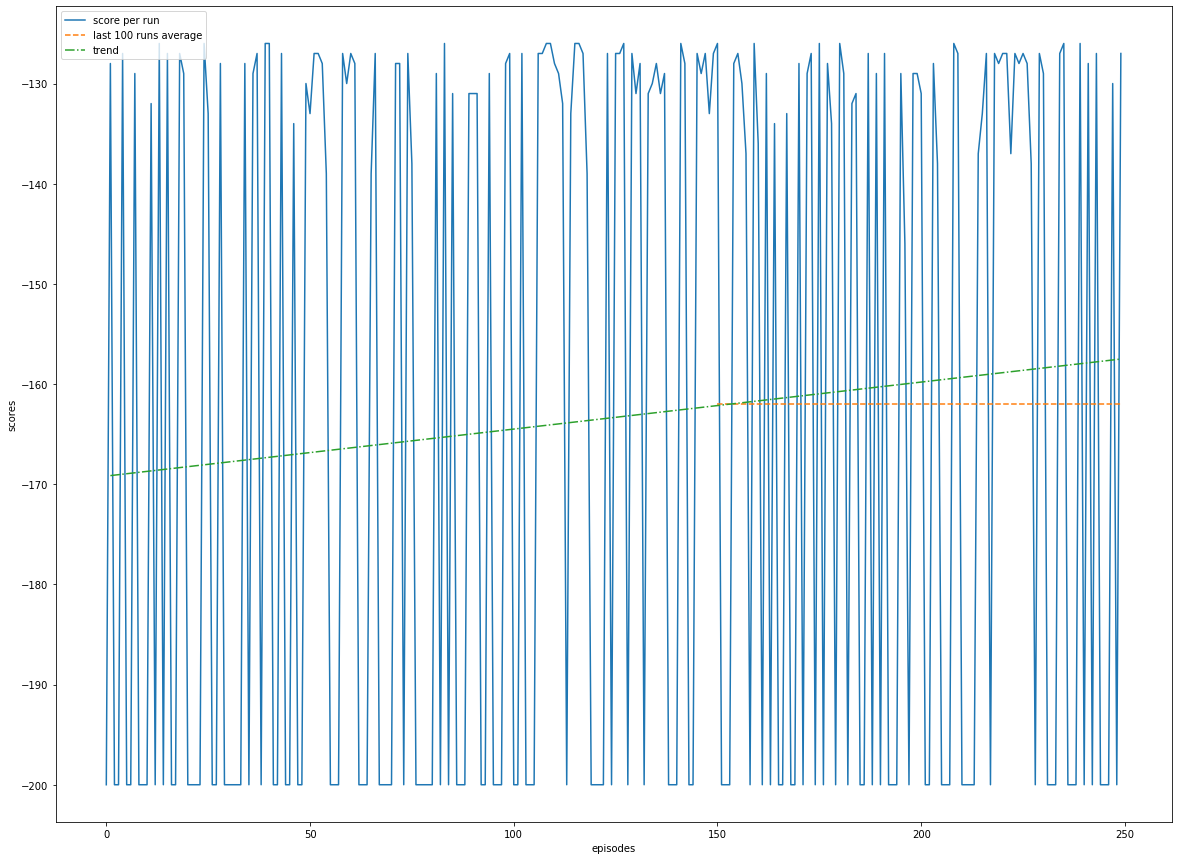

In [0]:
print('Average Score: ',sum(MountainCar_scores)/len(MountainCar_scores))
print(f"choice 1:{mean(MountainCar_choices,1)} choice 0:{mean(MountainCar_choices,0)} choice 2:{mean(MountainCar_choices,2)}")

plotTheValues(MountainCar_scores)

# FocusedNN Graphs

Average Score:  -146.42
choice 1:0.003496790056003278 choice 0:0.46567408823931156 choice 2:0.5308291217046851


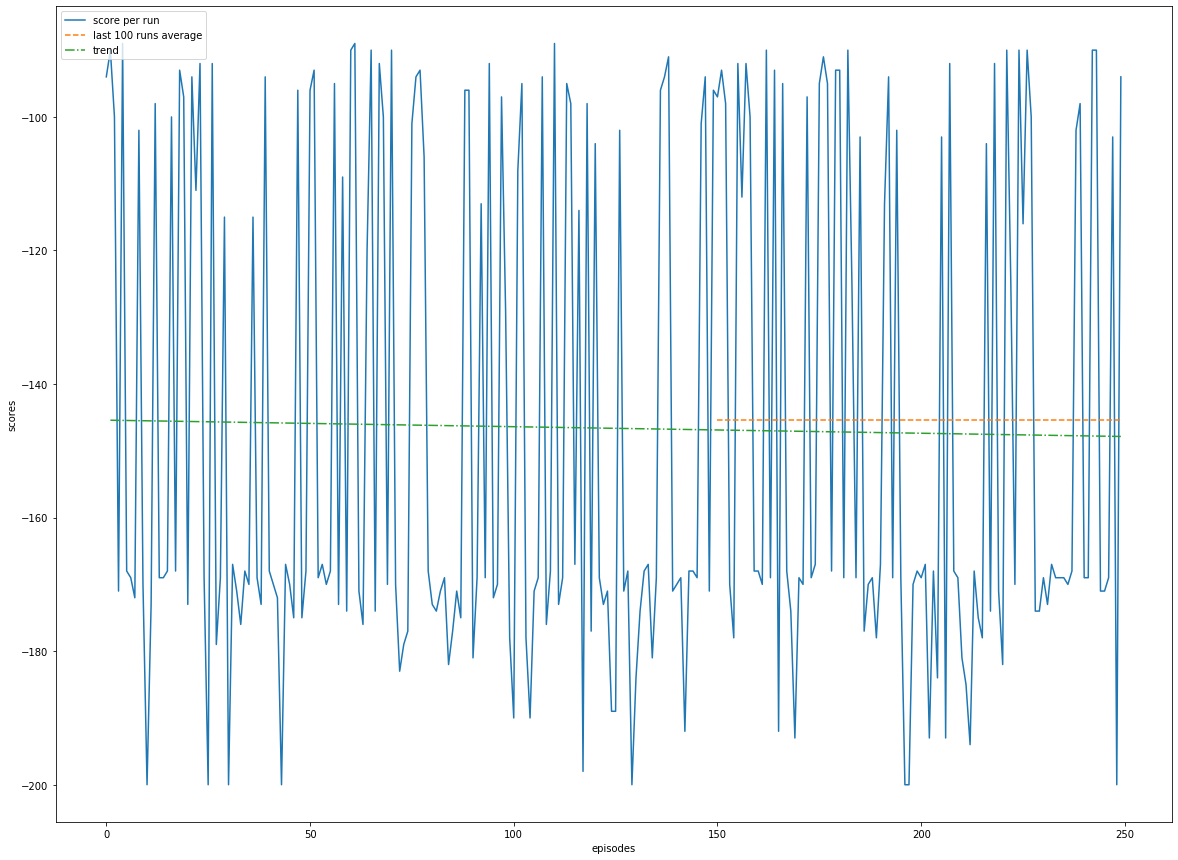

In [0]:
print('Average Score: ',sum(MountainCar_scores)/len(MountainCar_scores))
print(f"choice 1:{mean(MountainCar_choices,1)} choice 0:{mean(MountainCar_choices,0)} choice 2:{mean(MountainCar_choices,2)}")

plotTheValues(MountainCar_scores)

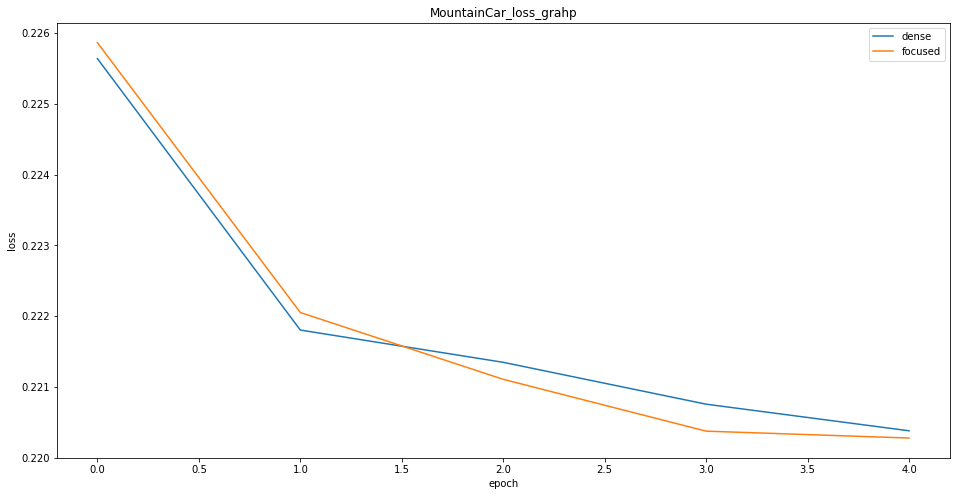

In [0]:
plt.figure(figsize=(16,8))
#plot between ile denemelerini göster
plt.title('MountainCar_loss_grahp')
plt.plot(MountainCar_model_history_dense.history['loss'])
plt.plot(MountainCar_model_history_focused.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense','focused'])
plt.savefig('./graphs/MountainCar_loss_grahp.png', bbox_inches="tight")

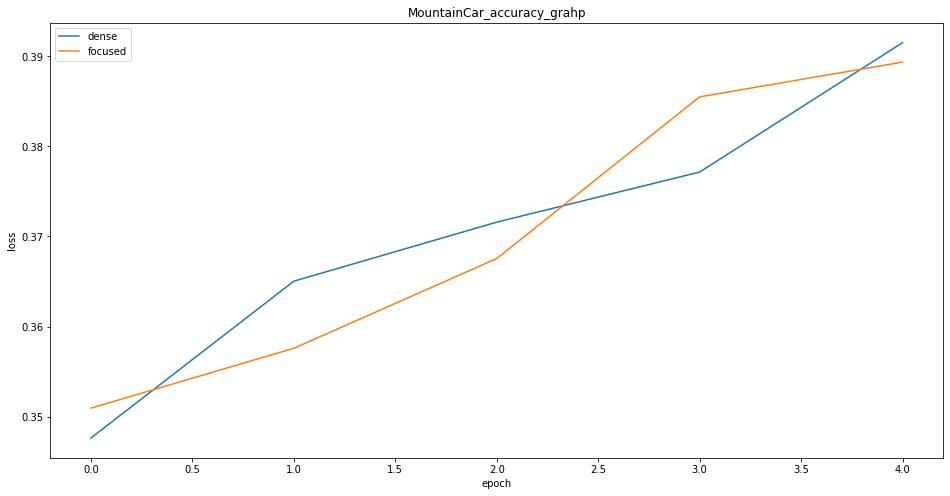

In [0]:
plt.figure(figsize=(16,8))
plt.title('MountainCar_accuracy_grahp')
plt.plot(MountainCar_model_history_dense.history['accuracy'])
plt.plot(MountainCar_model_history_focused.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense','focused'])
plt.savefig('./graphs/MountainCar_accuracy_grahp.png', bbox_inches="tight")

# CartPole section

In [0]:
def CartPole_Training(env,episodes,score_requirement,goal_steps):
    env.reset()
    training_data = []
    accepted_scores = []
    for game_index in range(episodes):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, done, info = env.step(action)

            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])

            previous_observation = observation
            score += reward
            if done:
                break

        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])

        env.reset()
    return training_data

In [0]:
def CartPole_Run(env,iterations,trained_model,goal_steps):
    env.reset()
    scores = []
    choices = []
    for each_game in range(iterations):
        score = 0
        prev_obs = []
        for step_index in range(goal_steps):
            # env.render()
            if len(prev_obs)==0:
                action = random.randrange(0,2)
            else:
                action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])

            choices.append(action)
            new_observation, reward, done, info = env.step(action)
            prev_obs = new_observation
            score+=reward
            if done:
                break

        env.reset()
        scores.append(score)
        
    return scores, choices

In [0]:
K.clear_session()

env = gym.make('CartPole-v1')
goal_steps = 200
score_requirement = 60
episodes = 10000
iterations = 250
mode = 'dense'
optimizer_s='adam'
epochs = 10

In [0]:
CartPole_Training_Data = CartPole_Training(env=env
                                           ,score_requirement=score_requirement
                                           ,episodes=episodes
                                           ,goal_steps=goal_steps)

In [0]:
CartPole_trained_model_dense, CartPole_model_history_dense = train_model(training_data=CartPole_Training_Data
                                                                         ,mode=mode
                                                                         ,epochs=epochs
                                                                         ,optimizer_s=optimizer_s)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 52)                6708      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 106       
Total params: 7,454
Trainable params: 7,454
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
13529/13529 [==============================] - 1s 43us/step - loss: 0.2531 - accuracy: 0.5990
Epoch 2/10
13529/13529 [==============================] - 0s 36us/step - loss: 0.2339 - accuracy: 0.6094
Epoch 3/10
13529/13529 [==============================] - 0s 35us/step - loss: 0.2336 - accuracy: 0.6055
Epoch 4/10
13529/13529 [==============================] - 1s 3

In [0]:
CartPole_trained_model_focused, CartPole_model_history_focused = train_model(training_data=CartPole_Training_Data
                                                                             ,mode='focused'
                                                                             ,epochs=epochs
                                                                             ,optimizer_s=optimizer_s)

{'name': 'focus-1'}
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               640       
_________________________________________________________________
focus-1 (FocusedLayer1D)     (None, 64)                8384      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 9,154
Trainable params: 9,154
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
13529/13529 [==============================] - 1s 81us/step - loss: 0.2465 - accuracy: 0.5989
Epoch 2/10
13529/13529 [==============================] - 1s 72us/step - loss: 0.2339 - accuracy: 0.6097
Epoch 3/10
13529/13529 [==============================] - 1s 65us/step - loss: 0.2332 - accuracy: 0.6074
Epoch 4/10
13529/13529 [==================

In [0]:
CartPole_scores, CartPole_choices = CartPole_Run(env=env
                                                 ,iterations=iterations
                                                 ,trained_model=CartPole_trained_model_focused
                                                 ,goal_steps=goal_steps)

Average Score:  147.204
choice 1:0.48824760196733785 choice 0:0.5117523980326621


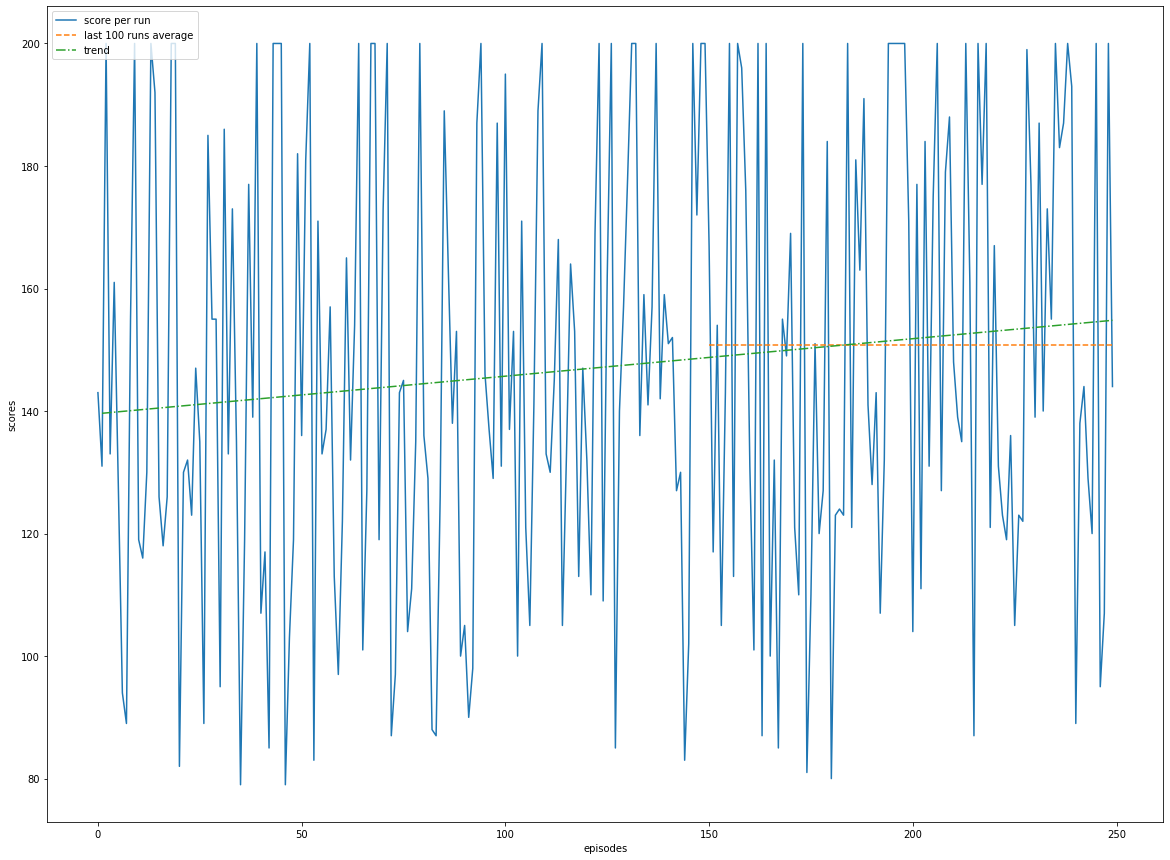

In [0]:
print('Average Score: ',sum(CartPole_scores)/len(CartPole_scores))
print(f"choice 1:{mean(CartPole_choices,1)} choice 0:{mean(CartPole_choices,0)}")


plotTheValues(CartPole_scores)

# FocusedNN Graphs

Average Score:  195.912
choice 1:0.49848911756298747 choice 0:0.5015108824370126


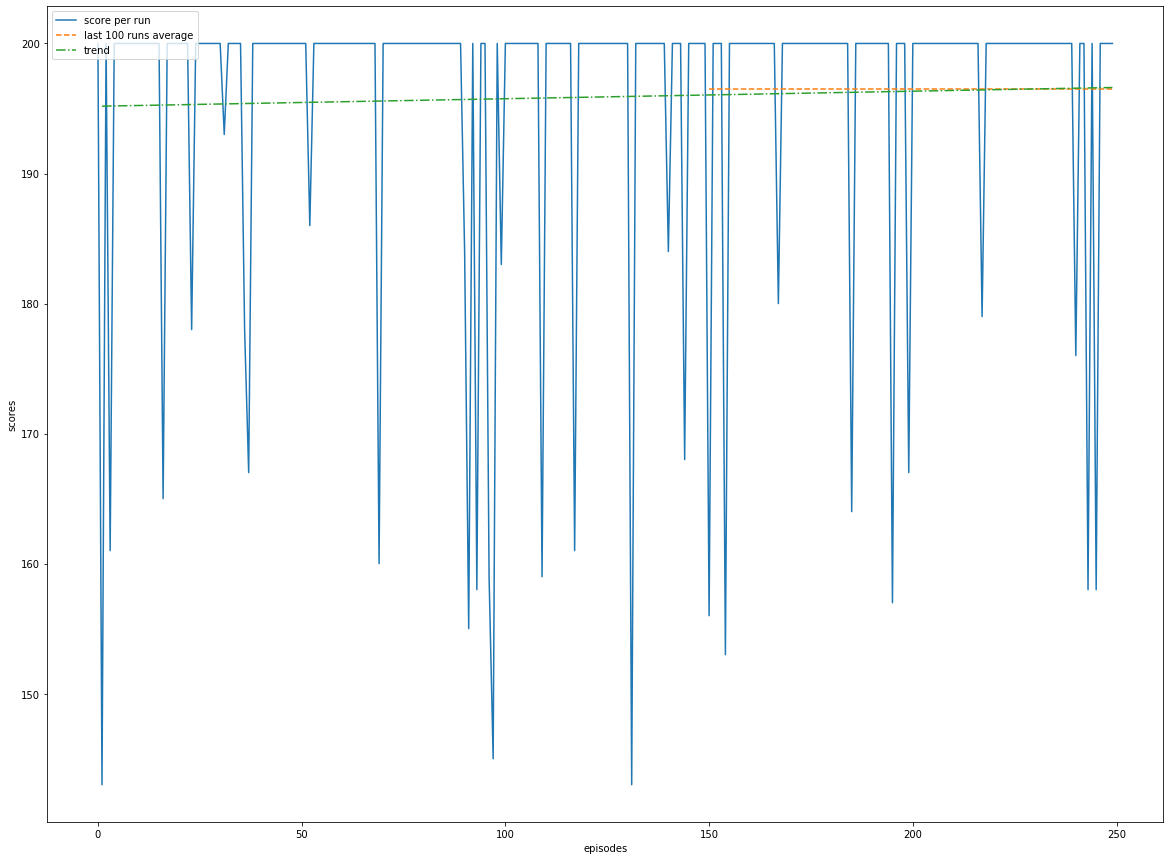

In [0]:
print('Average Score: ',sum(CartPole_scores)/len(CartPole_scores))
print(f"choice 1:{mean(CartPole_choices,1)} choice 0:{mean(CartPole_choices,0)}")


plotTheValues(CartPole_scores)


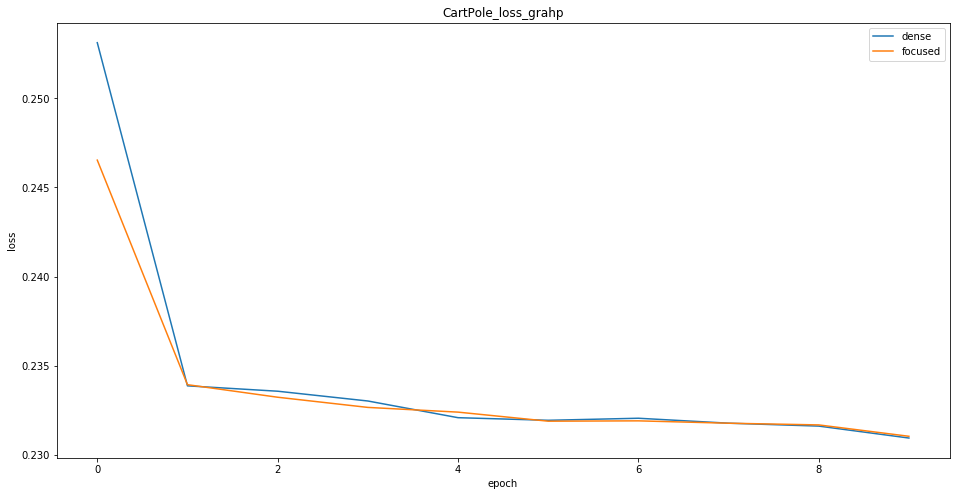

In [0]:
plt.figure(figsize=(16,8))
plt.title('CartPole_loss_grahp')
plt.plot(CartPole_model_history_dense.history['loss'])
plt.plot(CartPole_model_history_focused.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense','focused'])
plt.savefig('./graphs/CartPole_loss_grahp.png', bbox_inches="tight")

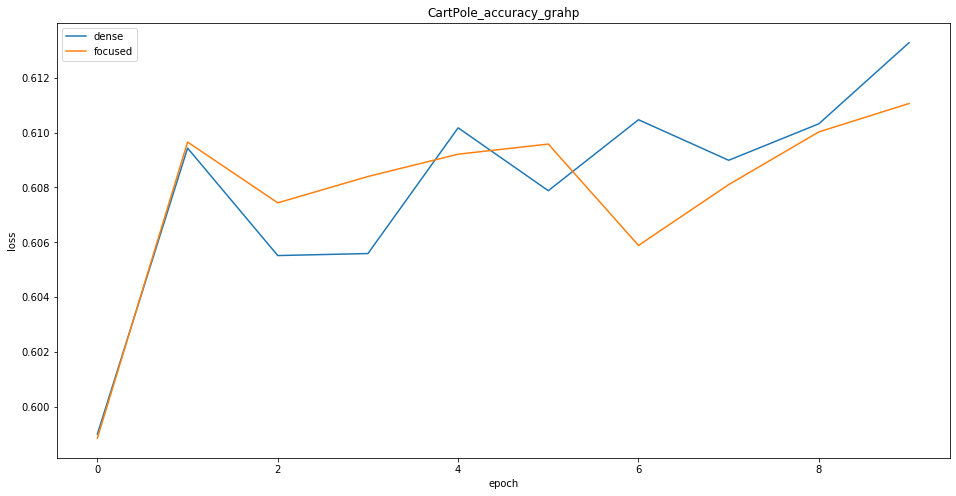

In [0]:
plt.figure(figsize=(16,8))
plt.title('CartPole_accuracy_grahp')
plt.plot(CartPole_model_history_dense.history['accuracy'])
plt.plot(CartPole_model_history_focused.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['dense','focused'])
plt.savefig('./graphs/CartPole_accuracy_grahp.png', bbox_inches="tight")